# Linear Regression Models

Linear models make a prediction based on a linear equation. The 'best' linear equation is determined from the input features, by minimizing the *mean squared error*.

The general form a linear equation is:

y = mx + b

Where:
- m is the slope
- b is the y-intercept

The general form of a linear equation used for predictions is:

### General form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!


In the standard LinearRegression model, the coefficients are determined such that the **mean squared error** is minimized between the predictions and the known true target values. 

Linear Regression models can be used for both supervised:
- **Classification:** Predict a categorical response
- **Regression:** Predict a continuous response



This notebook will look at the following Linear Regression Models from scikit-learn.

- LinearRegression
- Ridge
- Lasso

This notebook will also describe *PolynomialFeatures* preprocessing class to provide a high order linear equation.

# TODO: 
look at: https://github.com/justmarkham/DAT5/blob/master/notebooks/09_linear_regression.ipynb

- incorporate some of this information
- add add more information from python data science handbook
- add old faithful example


## Simple Linear Regression

Create a scatter plot of the simple linear equation:

*y = 2x - 5*


In [110]:
rng = np.random.RandomState(1)
x = 10*rng.rand(50)  # generate 50 random numbers between 0 and 10  rng.rand produces numbers 0 to 1
# randn: “normal” (Gaussian) distribution of mean 0 and variance 1 
y = 2*x - 5 + rng.randn(50) # create y with a slope of 2, intercept -5, 50 times with some noise

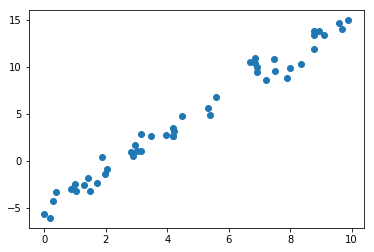

In [111]:
plt.scatter(x,y)

Use Scikit-Learns *LinearRegression* estimator to construct a best fit line making 1000 predictions from an input value for *x*.

Create a standard LinearRegression model

In [112]:
linear_regression_model = LinearRegression(fit_intercept=True)

Fit the model to the data we created above.  The *fit* method will create the linear equation and coefficients

In [113]:
# Recall for the 'fit' method, the features have to be a Pandas Series.
# there are two ways to do this:
# x_series = x.reshape(-1, 1)  this says to reshape the array as all of the rows, as a single column ( series )
# x_series = x[:, np.newaxis]  this says to create a Series with all of the rows and a new column (series)
x_series = x[:, np.newaxis]
linear_regression_model.fit(x_series, y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Create 1000 new x values to use to predict a y value.

In [114]:
# create 1000 datapoints from 0 to 10 as an array
x_input_values = np.linspace(0,10,1000) 

# x_input_series is now a series, same as x_input_values.reshape(-1,1)
x_input_series = x_input_values[:, np.newaxis] 

For the 1000 new x values, predict the set of y values

In [115]:
y_predicted = linear_regression_model.predict(x_input_series)

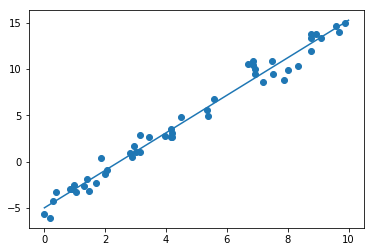

In [116]:
plt.scatter(x,y)
plt.plot(x_input_series, y_predicted)

In [117]:
print(f"Model slope: {linear_regression_model.coef_[0]}")
print(f"Model intercept: {linear_regression_model.intercept_}")

Model slope: 2.0272088103606953
Model intercept: -4.998577085553204


We can see that the model predicted the actual equation of the line very well in this case.

What about data that is less linear in nature.  Lets plot the equation of the line:

y = sin(x) + 0.1 * random_value

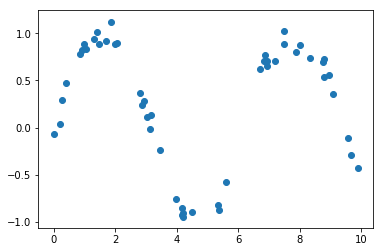

In [118]:
rng = np.random.RandomState(1)
x = 10*rng.rand(50)  # generate 50 random numbers between 0 and 10

# randn: “normal” (Gaussian) distribution of mean 0 and variance 1 
y = np.sin(x) + 0.1 * rng.randn(50) # create y with a slope of 2, intercept -5, 50 times with some noise

# plot the scatter
plt.scatter(x,y)

Lets try to fit a linear equation to these data points

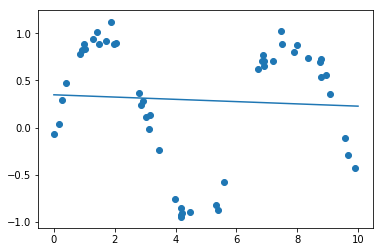

In [119]:
# create the model
linear_regression_model = LinearRegression(fit_intercept=True)

# fit the x, y values
x_series = x[:, np.newaxis]
linear_regression_model.fit(x_series, y)

# create 1000 datapoints from 0 to 10 as an array
x_input_values = np.linspace(0,10,1000) 

# x_input_series is now a series, same as x_input_values.reshape(-1,1)
x_input_series = x_input_values[:, np.newaxis] 

# predict y values for the x input values
y_predicted = linear_regression_model.predict(x_input_series)
plt.scatter(x,y)
plt.plot(x_input_series, y_predicted)

As you can see the linear equation does not do well for this kind of data.  

For data that is not linear, we need to look at higher ordered polynomials and create a *Polynomial Regression* model.

To do this, Scikit-Learn has a preprocessing module and a *PolynomialFeatures* class

$y = \beta_0 + \beta_1x_1 + \beta_2x_2^2 + \beta_2x_2^3 + ... + \beta_nx_n$


Keep in mind that this is still a linear equation. The linearity refers to the fact that the coeficients beta_n are never multiply or divide each other.

Lets look at how to create PolynomialFeatures by preprocessing the data.  This section will make use of scikit-learn pipelines, to make the code easier to read.  Pipelines are a way to create a data processing *pipeline* instead of writing each step individually.

In [120]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

### 3rd order Polynomial Linear Model

Create a pipeline that will run the values through the PolynomialFeatures class and then process them through the LinearRegression class.

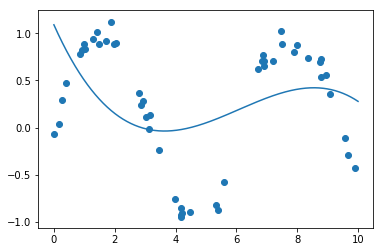

In [121]:
poly_model_3 = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly_model_3.fit(x_series,y)
y_poly_3_predict = poly_model_3.predict(x_input_series)
plt.scatter(x,y)
plt.plot(x_input_series, y_poly_3_predict)

A third degree polynomial is not any better, but we start to see how the higher degree polynomial is changing the predicted curve.

Lets try 5th and 7th degree polynomial.

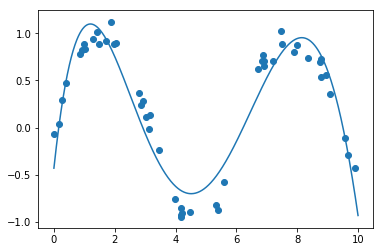

In [122]:
poly_model_5 = make_pipeline(PolynomialFeatures(5), LinearRegression())
poly_model_5.fit(x_series,y)
y_poly_5_predict = poly_model_5.predict(x_input_series)
plt.scatter(x,y)
plt.plot(x_input_series, y_poly_5_predict)

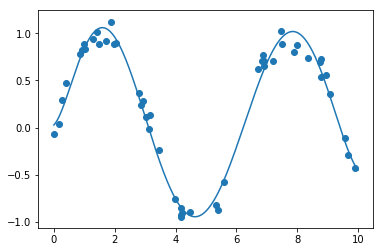

In [123]:
poly_model_7 = make_pipeline(PolynomialFeatures(7), LinearRegression())
poly_model_7.fit(x_series,y)
y_poly_7_predict = poly_model_7.predict(x_input_series)
plt.scatter(x,y)
plt.plot(x_input_series, y_poly_7_predict)

We can see that a standard LinearRegression model, using a 7th ordered ploynomial preprocessing function, can fit the nonlinear data very well.

#### Overfitting

For a 15th degree polynomial, we can start to see that we are overfitting. 

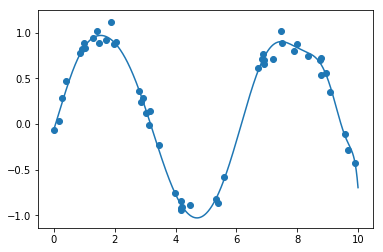

In [124]:
poly_model_15 = make_pipeline(PolynomialFeatures(15), LinearRegression())

poly_model_15.fit(x_series,y)
y_predict = poly_model_15.predict(x_input_series)
plt.scatter(x,y)
plt.plot(xfit_series, y_predict)



Calculate the RMSE for each of the models and see how each on compares with the others.

In [125]:

lrm = np.sqrt(-cross_val_score(linear_regression_model, x_series, y, cv=10, scoring='neg_mean_squared_error')).mean()

poly3 = np.sqrt(-cross_val_score(poly_model_3, x_series, y, cv=10, scoring='neg_mean_squared_error')).mean()
poly7 = np.sqrt(-cross_val_score(poly_model_7, x_series, y, cv=10, scoring='neg_mean_squared_error')).mean()
poly5 = np.sqrt(-cross_val_score(poly_model_5, x_series, y, cv=10, scoring='neg_mean_squared_error')).mean()
poly15 = np.sqrt(-cross_val_score(poly_model_15, x_series, y, cv=10, scoring='neg_mean_squared_error')).mean()


print(f"Linear Regression error: {lrm}")
print(f"3rd Degree Polynomial error: {poly3}")
print(f"5th Degree Polynomial error: {poly5}")
print(f"7th Degree Polynomial error: {poly7}")
print(f"15th Degree Polynomial error: {poly15}")

Linear Regression error: 0.6438219152491099
3rd Degree Polynomial error: 0.6287940564914577
5th Degree Polynomial error: 0.22723083051616233
7th Degree Polynomial error: 0.11618129422620185
15th Degree Polynomial error: 0.1429027044616243


The 7th Degree Polynomial has the smallest RMSE and out of this group of models is the best of the group.

## Regularization

Regularization is a way to handle overfitting by keeping the coefficients to the linear equation from getting too big, and sometimes the coefficients are zero.  This is a way of reducing the complexity of a model, and therefore you will reduce the chance of overfitting.

There is two types of regularization:

### L1 Regularization ( Lasso )
This type of regularization attempts to minimize the sum of the absolute values of the coefficients.

L1 regularization—penalizing the absolute value of all the weights—turns out to be quite efficient for wide models

We can use L1 regularization to encourage many of the uninformative coefficients in our model to be exactly 0


### L2 Regularization (Ridge)
This type of regularization attempts to minimuze the sum of the squares of the coefficients. 

L2 regularization encourages weights to be small, but doesn't force them to exactly 0.0.
 
Both models take a parameter alpha that controls the complexity of the model.  As the alpha approaches zero, the model becomes more like the general LinearRegression model.  As alpha grows, all model responses are suppressed.

L2 and L1 penalize weights differently:

- L2 penalizes weight2.

- L1 penalizes |weight|.

Consequently, L2 and L1 have different derivatives:

The derivative of L2 is 2 * weight.

The derivative of L1 is k (a constant, whose value is independent of weight).

You can think of the derivative of L2 as a force that removes x% of the weight every time. As Zeno knew, even if you remove x percent of a number billions of times, the diminished number will still never quite reach zero. (Zeno was less familiar with floating-point precision limitations, which could possibly produce exactly zero.) At any rate, L2 does not normally drive weights to zero.

You can think of the derivative of L1 as a force that subtracts some constant from the weight every time. However, thanks to absolute values, L1 has a discontinuity at 0, which causes subtraction results that cross 0 to become zeroed out. For example, if subtraction would have forced a weight from +0.1 to -0.2, L1 will set the weight to exactly 0. Eureka, L1 zeroed out the weight.


In [1]:
%%HTML
<video width="320" height="240" controls>
  <source src="./data/video/L1_L2_Regularization.mp4" type="video/mp4">
</video>

/Users/patryan/Development/mygithub/machinelearning101/venv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


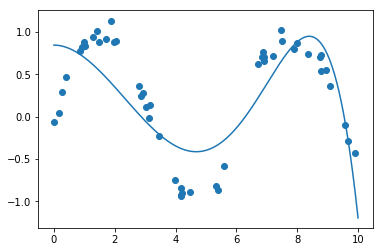

In [126]:
from sklearn.linear_model import Lasso
poly_model_15 = make_pipeline(PolynomialFeatures(7), Lasso(alpha=0.1))

poly_model_15.fit(x_series,y)
yfit = poly_model_15.predict(xfit_series)
plt.scatter(x,y)
plt.plot(xfit_series, yfit)

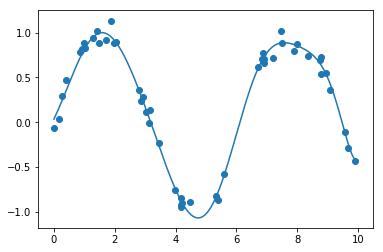

In [127]:
from sklearn.linear_model import Ridge
poly_model_15 = make_pipeline(PolynomialFeatures(15), Ridge(alpha=0.1))

poly_model_15.fit(x_series,y)
yfit = poly_model_15.predict(xfit_series)
plt.scatter(x,y)
plt.plot(xfit_series, yfit)

## Using LinearRegression to predict sales

In this section we will use Advertising data to predict sales based on TV/Radio and Newspaper advertising.

In [128]:
# conventional way to import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline 

In [129]:
# read CSV file directly from a URL and save the results
data = pd.read_csv('./data/Advertising.csv', index_col=0)

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Primary object types:

- **DataFrame:** rows and columns (like a spreadsheet)
- **Series:** a single column

In [130]:
# display the last 5 rows
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [131]:
# check the shape of the DataFrame (rows, columns)
data.shape

(200, 4)

What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

## Visualizing data using seaborn

**Seaborn:** Python library for statistical data visualization built on top of Matplotlib

- Anaconda users: run **`conda install seaborn`** from the command line
- Other users: [installation instructions](http://stanford.edu/~mwaskom/software/seaborn/installing.html)

In [132]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

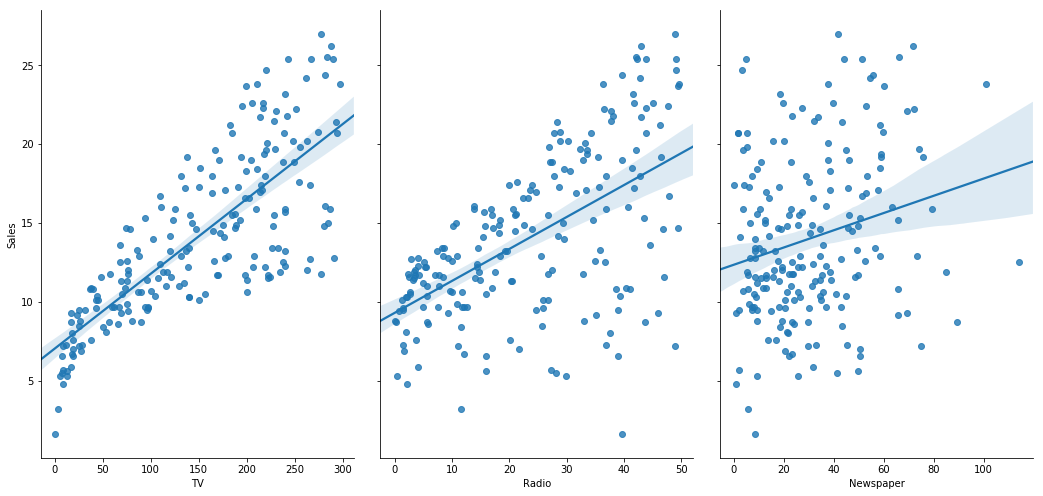

In [133]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

## Preparing X and y using pandas

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [134]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['TV', 'Radio', 'Newspaper']]

# print the first 5 rows
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [135]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [136]:
# select a Series from the DataFrame
y = data['Sales']

# equivalent command that works if there are no spaces in the column name
y = data.Sales

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [137]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


## Splitting X and y into training and testing sets

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [139]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


## Linear regression in scikit-learn

In [140]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Interpreting model coefficients

In [141]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179335
[0.04656457 0.17915812 0.00345046]


In [142]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.04656456787415027),
 ('Radio', 0.17915812245088833),
 ('Newspaper', 0.0034504647111804365)]

$$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$

How do we interpret the **TV coefficient** (0.0466)?

- For a given amount of Radio and Newspaper ad spending, **a "unit" increase in TV ad spending** is associated with a **0.0466 "unit" increase in Sales**.
- Or more clearly: For a given amount of Radio and Newspaper ad spending, **an additional $1,000 spent on TV ads** is associated with an **increase in sales of 46.6 items**.

Important notes:

- This is a statement of **association**, not **causation**.
- If an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

### Making predictions

In [143]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

We need an **evaluation metric** in order to compare our predictions with the actual values!

## Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:

In [144]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [145]:
# calculate MAE by hand
print((10 + 0 + 20 + 10)/4.)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [146]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [147]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

### Computing the RMSE for our Sales predictions

In [148]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.404651423032896


## Feature selection

Does **Newspaper** "belong" in our model? In other words, does it improve the quality of our predictions?

Let's **remove it** from the model and check the RMSE!

In [149]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382893


The RMSE **decreased** when we removed Newspaper from the model. (Error is something we want to minimize, so **a lower number for RMSE is better**.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.

## Cross-validation example: feature selection

**Goal**: Select whether the Newspaper feature should be included in the linear regression model on the advertising dataset using Cross Validation.

In [150]:
from sklearn.model_selection import cross_val_score

In [151]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [152]:
# create a Python list of three feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the DataFrame (X)
X = data[feature_cols]

# select the Sales column as the response (y)
y = data.Sales

In [153]:
# 10-fold cross-validation with all three features
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [154]:
# fix the sign of MSE scores
mse_scores = -scores
print(mse_scores)

[3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]


In [155]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[1.88689808 1.81595022 1.44548731 1.68069713 1.14139187 1.31971064
 2.85891276 1.45399362 1.7443426  1.56614748]


In [156]:
# calculate the average RMSE
print(rmse_scores.mean())

1.6913531708051803


In [157]:
# 10-fold cross-validation with two features (excluding Newspaper)
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

1.6796748419090768


### Conclusion:

With Newspaper, the RMSE was 1.69 where without Newspaper the RMSE was 1.67.  Since a lower error is better, we would conclude that the model without Newspaper produces more accurate results.

This was the same conclusion when using train_test_split, but using cross_val_score to make the feature selection provides a better measure of how that feature performed across the entire training set data.


## Resources

Linear regression:

- [Longer notebook on linear regression](https://github.com/justmarkham/DAT5/blob/master/notebooks/09_linear_regression.ipynb) by Kevin Markham of DataSchool.io
- Chapter 3 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) and [related videos](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) by Hastie and Tibshirani (Stanford)
- [Quick reference guide to applying and interpreting linear regression](http://www.dataschool.io/applying-and-interpreting-linear-regression/) by me
- [Introduction to linear regression](http://people.duke.edu/~rnau/regintro.htm) by Robert Nau (Duke)

Pandas:

- [Three-part pandas tutorial](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/) by Greg Reda
- [read_csv](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) and [read_table](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html) documentation

Seaborn:

- [Official seaborn tutorial](http://web.stanford.edu/~mwaskom/software/seaborn/tutorial.html)
- [Example gallery](http://web.stanford.edu/~mwaskom/software/seaborn/examples/index.html)